<a href="https://colab.research.google.com/github/Dinesh-Adhithya-H/Digital-Image-Processing/blob/main/Image_Segmentation_Watershed_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
from skimage import morphology 
from skimage.segmentation import watershed,random_walker
from skimage.feature import peak_local_max
from scipy import ndimage

In [2]:
img_test=np.zeros([15,15])
img_test[2:5,5:11]=120+np.random.randint(0,5,[3,6])
img_test[5:10,9:14]=120+np.random.randint(0,5,[5,5])
img_test[5:13,2:5]=220+np.random.randint(0,5,[8,3])

In [18]:
distance_t=ndimage.distance_transform_edt(img_test)

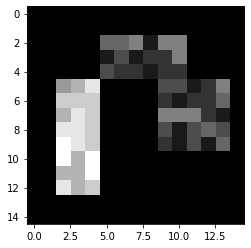

In [19]:
plt.imshow(img_test,cmap="gray")

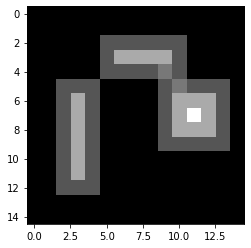

In [20]:
plt.imshow(distance_t,cmap="gray")

In [50]:
local_maxima=peak_local_max(distance_t,indices=False,labels=img_test,footprint=np.ones((5,5)))

In [51]:
seeds=morphology.label(local_maxima)

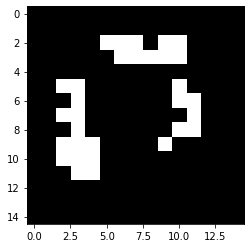

In [52]:
plt.imshow(local_maxima,cmap="gray")

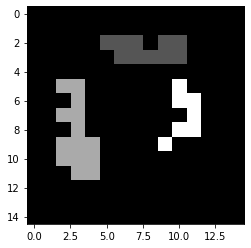

In [53]:
plt.imshow(seeds,cmap="gray")

In [54]:
segment=watershed(-distance_t,seeds,mask=img_test)

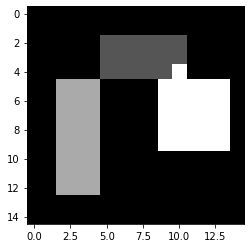

In [55]:
plt.imshow(segment,cmap="gray")

In [58]:
!wget https://raw.githubusercontent.com/maponti/imageprocessing_course_icmc/master/images/scarlett.jpg

--2021-11-07 17:32:49--  https://raw.githubusercontent.com/maponti/imageprocessing_course_icmc/master/images/scarlett.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91495 (89K) [image/jpeg]
Saving to: ‘scarlett.jpg.1’

scarlett.jpg.1      100%[===================>]  89.35K  --.-KB/s    in 0.008s  

2021-11-07 17:32:49 (10.9 MB/s) - ‘scarlett.jpg.1’ saved [91495/91495]



In [59]:
img=imageio.imread("scarlett.jpg.1")

In [61]:
no_seeds=20
random_seeds=np.zeros(img.shape)
indices=np.random.randint(0,img.shape[0],[no_seeds,2])
random_seeds[indices[:,0],indices[:,1]]=img[indices[:,0],indices[:,1]]
random_seeds=morphology.dilation(random_seeds,morphology.disk(4)).astype(np.uint8)

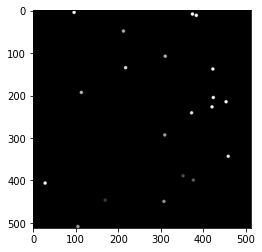

In [63]:
plt.imshow(random_seeds,cmap="gray")

In [69]:
img_dil=morphology.dilation(img,morphology.disk(2)).astype(np.uint8)
img_ero=morphology.erosion(img,morphology.disk(1)).astype(np.uint8)
img_grad=img_dil-img_ero

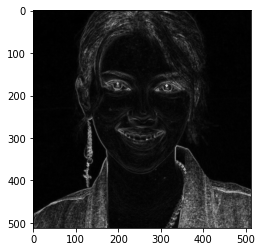

In [70]:
plt.imshow(img_grad,cmap="gray")

In [71]:
img_segment=watershed(img_grad,random_seeds)

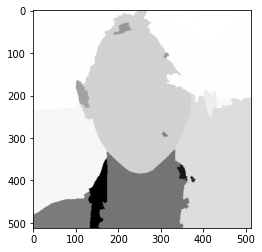

In [72]:
plt.imshow(img_segment,cmap="gray")

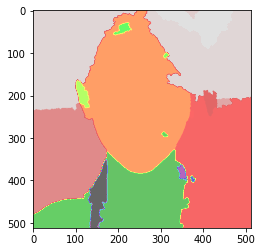

In [73]:
plt.imshow(img_segment,cmap=plt.cm.nipy_spectral,alpha=0.6)